In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

In [2]:
DEVICE = 'cuda:0'
MAX_EPOCHS = 100
EXPECTED_N = 10000

## Torus model

In [3]:
def model(params, center = np.array([0.5, 0.5])):
    a, b = params['a'], params['b']
    r = ((a-center[0])**2+(b-center[1])**2)**0.5  # Return radial distance from center
    x = np.array([r])
    return dict(x=x)

def noise(obs, params, noise = np.array([0.01])):
    x = obs['x']
    n = np.random.randn(*x.shape)*noise
    return dict(x = x + n)

par0 = dict(a=0.2, b=0.5)
obs0 = model(par0)  # Using Asimov data

In [4]:
cache = swyft.MemoryCache(params = ['a', 'b'], obs_shapes = dict(x=(1,)))

Creating new cache.


In [5]:
prior = swyft.Prior({"a": ["uniform", 0., 1.], "b": ["uniform",  0., 1.]})

## Inference

In [62]:
s = swyft.SWYFT(model, noise, prior, cache, obs0, device = DEVICE)
#s.infer1d(Ninit = 30000, tail_args = dict(n_hidden = 256, p = 0.0, n_tail_features = 1), train_args = dict(batch_size=32, lr_schedule = [1e-3, 3e-4, 1e-4]), max_rounds = 1)

In [83]:
s.infer2d(N = 100000, train_args = dict(batch_size=64, n_hidden = 256, p = 0.2, n_tail_features = 10, lr_schedule = [1e-3, 3e-4, 1e-4]))

N = 100000
Round: 4


Simulate:   2%|▏         | 99/4371 [00:00<00:04, 982.56it/s]

Adding 4371 new samples. Run simulator!


Simulate: 100%|██████████| 4371/4371 [00:04<00:00, 959.17it/s]


n_features = 1
Start training
LR iteration 0
Validation loss: 2.7875541921048654
Validation loss: 2.7885916933411368
Total epochs: 2
LR iteration 1
Validation loss: 2.7002069902953463
Validation loss: 2.685224141947898
Validation loss: 2.685328757124713
Total epochs: 3


In [88]:
post = s.posteriors(n_samples = 1000000)

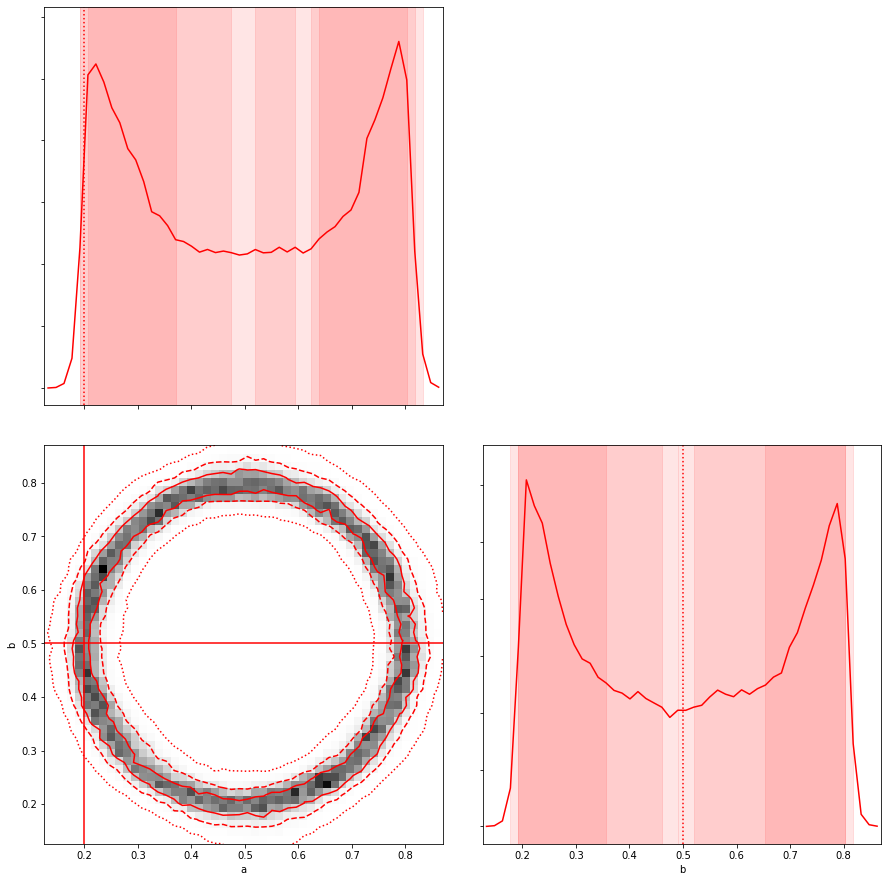

In [87]:
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 100000
Round: 5


Simulate:   0%|          | 0/492 [00:00<?, ?it/s]

Adding 492 new samples. Run simulator!


Simulate: 100%|██████████| 492/492 [00:00<00:00, 964.67it/s]


n_features = 1
Start training
LR iteration 0
Validation loss: 2.786460378800534
Validation loss: 2.765127642177518
Validation loss: 2.768385350941946
Total epochs: 3
LR iteration 1
Validation loss: 2.6850600403811193
Validation loss: 2.6837869335514264
Validation loss: 2.679833225772159
Validation loss: 2.685091002390686
Total epochs: 4


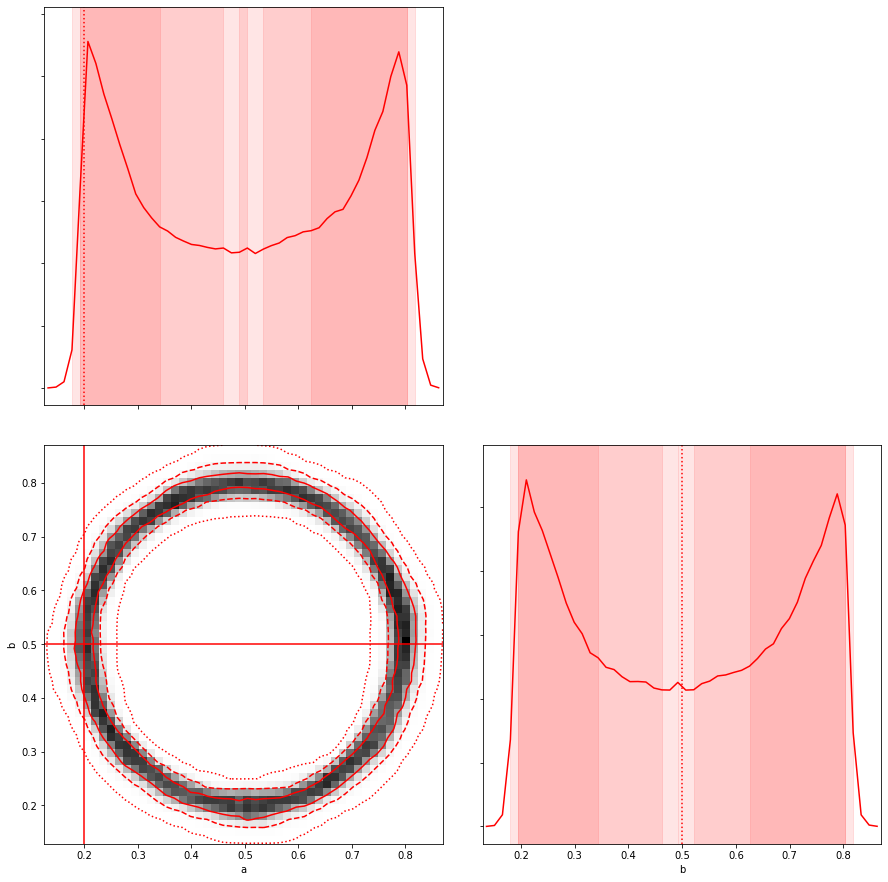

In [89]:
s.infer2d(N = 100000, train_args = dict(batch_size=64, n_hidden = 256, p = 0.2, n_tail_features = 2, lr_schedule = [1e-3, 3e-4, 1e-4]))
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 50000
Round: 6


Simulate: 100%|██████████| 14/14 [00:00<00:00, 942.74it/s]

Adding 14 new samples. Run simulator!


n_features = 1
Start training
LR iteration 0
Validation loss: 2.8650394647195636
Validation loss: 2.7849164327810216
Validation loss: 2.7613525344482537
Validation loss: 2.7729528432166397
Total epochs: 4
LR iteration 1
Validation loss: 2.678790098890151
Validation loss: 2.6883388977477005
Total epochs: 2


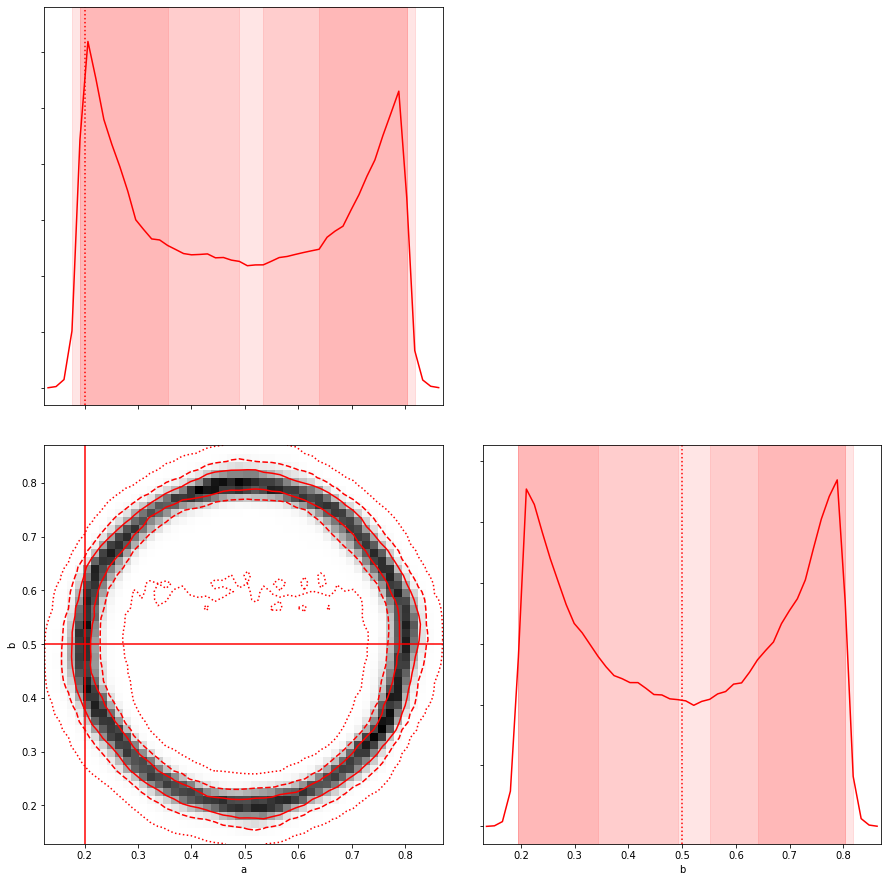

In [90]:
s.infer2d(N = 50000, train_args = dict(batch_size=64, n_hidden = 256, p = 0.2, n_tail_features = 10, lr_schedule = [1e-3, 3e-4, 1e-4]))
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 100000
Round: 7


Simulate:   0%|          | 0/78 [00:00<?, ?it/s]

Adding 78 new samples. Run simulator!


Simulate: 100%|██████████| 78/78 [00:00<00:00, 963.67it/s]


n_features = 1
Start training
LR iteration 0
Validation loss: 2.937614967675504
Validation loss: 2.8127961317222274
Validation loss: 2.8118741444246975
Validation loss: 2.7823623959413784
Validation loss: 2.7840426559933644
Total epochs: 5
LR iteration 1
Validation loss: 2.7257374322343018
Validation loss: 2.722455730980742
Validation loss: 2.70947031648811
Validation loss: 2.7263079556162486
Total epochs: 4


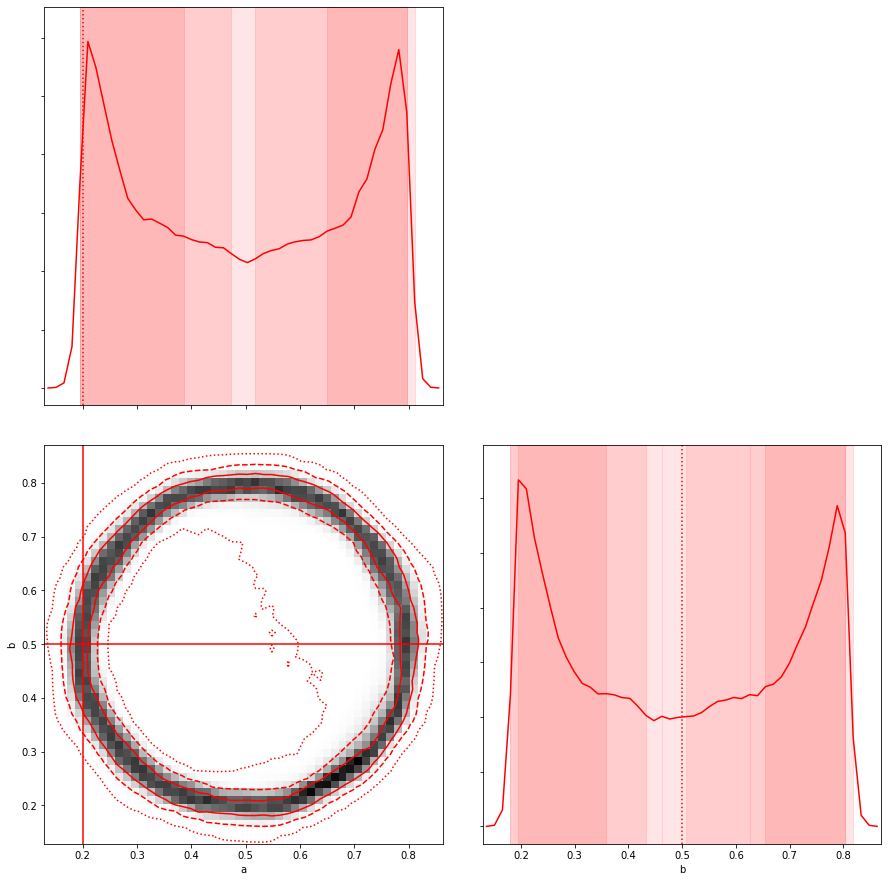

In [91]:
s.infer2d(N = 100000, train_args = dict(batch_size=64, n_hidden = 256, p = 0.0, n_tail_features = 10, lr_schedule = [1e-3, 3e-4, 1e-4]))
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 100000
Round: 8
Adding 1372 new samples. Run simulator!


Simulate: 100%|██████████| 1372/1372 [00:01<00:00, 896.28it/s]


n_features = 1
Start training
LR iteration 0
Validation loss: 2.9196033731870923
Validation loss: 2.846890383418255
Validation loss: 2.8266047579119125
Validation loss: 2.806103084356938
Validation loss: 2.8062020976734887
Total epochs: 5
LR iteration 1
Validation loss: 2.7312202496715323
Validation loss: 2.726779666772805
Validation loss: 2.7225986402176687
Validation loss: 2.711931703760297
Validation loss: 2.716853220154179
Total epochs: 5


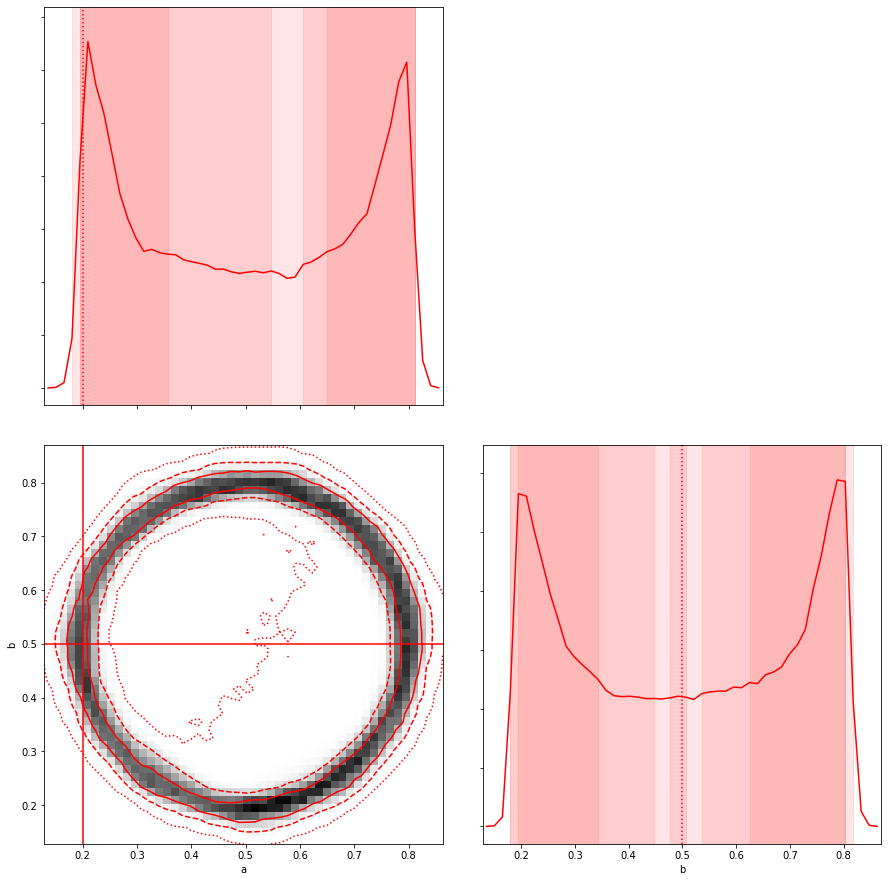

In [92]:
s.infer2d(N = 100000, train_args = dict(batch_size=16, n_hidden = 256, p = 0.2, n_tail_features = 10, lr_schedule = [1e-3, 3e-4, 1e-4]))
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 100000
Round: 9
Adding 28 new samples. Run simulator!


Simulate: 100%|██████████| 28/28 [00:00<00:00, 769.30it/s]


n_features = 1
Start training
LR iteration 0
Validation loss: 2.828844948441255
Validation loss: 2.8196304776295813
Validation loss: 2.7885404264435962
Validation loss: 2.778615978158793
Validation loss: 2.7511737454847927
Validation loss: 2.7773978342203463
Total epochs: 6
LR iteration 1
Validation loss: 2.710462484918371
Validation loss: 2.7132524707135275
Total epochs: 2


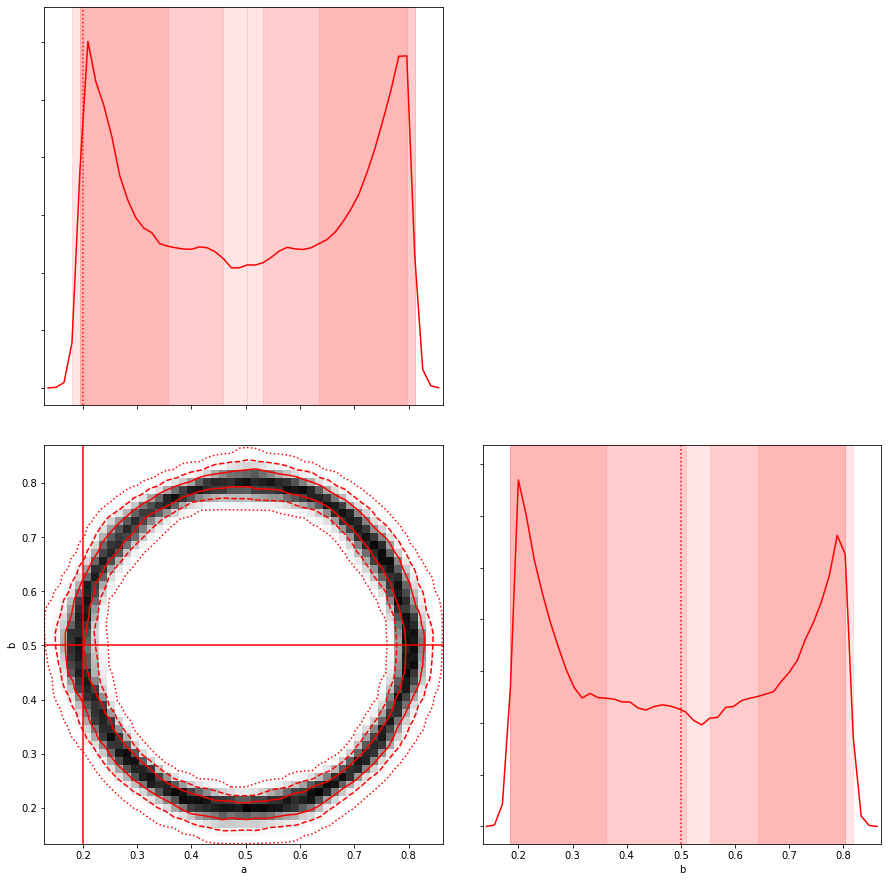

In [93]:
s.infer2d(N = 100000, train_args = dict(batch_size=64, n_hidden = 64, p = 0.2, n_tail_features = 10, lr_schedule = [1e-3, 3e-4, 1e-4]))
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 50000
Round: 10
No new simulator runs required.
No simulations required.
n_features = 1
Start training
LR iteration 0
Validation loss: 3.006445337490863
Validation loss: 2.96468424337456
Validation loss: 2.87459708289449
Validation loss: 2.895691435404092
Total epochs: 4
LR iteration 1
Validation loss: 2.7956681932790213
Validation loss: 2.786482568964901
Validation loss: 2.77690126340552
Validation loss: 2.759595367755277
Validation loss: 2.7561826594383363
Validation loss: 2.753025538184078
Validation loss: 2.744767553595654
Validation loss: 2.7454954166488954
Total epochs: 8


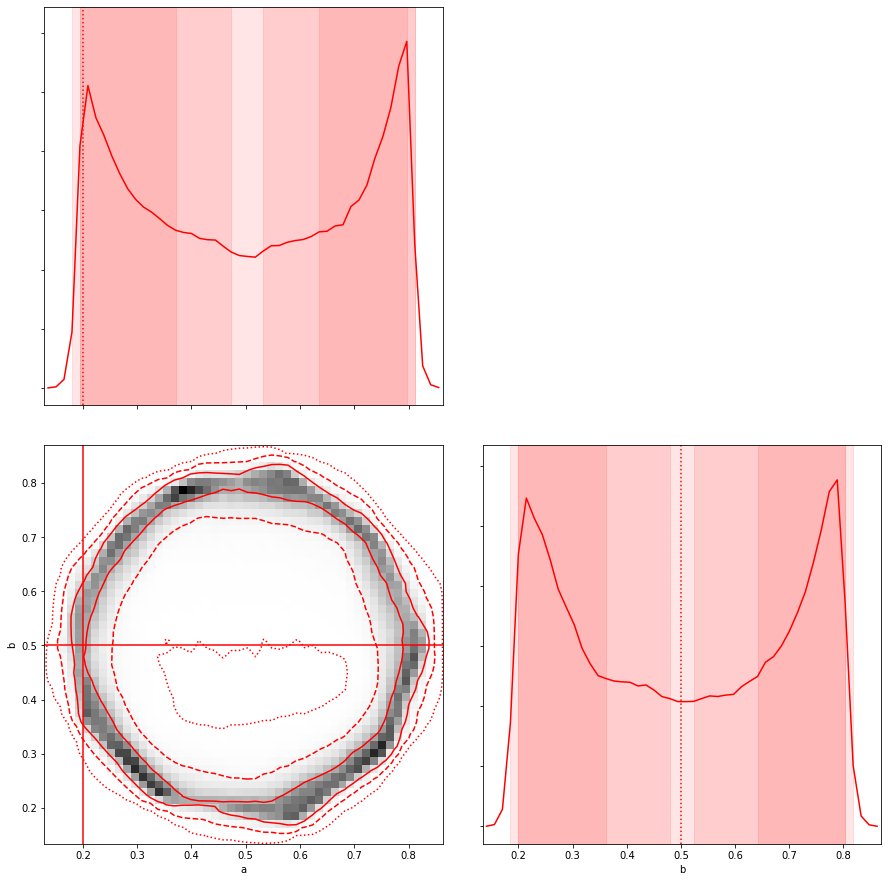

In [94]:
s.infer2d(N = 50000, train_args = dict(batch_size=64, n_hidden = 256, p = 0.2, n_tail_features = 2, lr_schedule = [1e-3, 3e-4, 1e-4]))
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 100000
Round: 11
Adding 851 new samples. Run simulator!


Simulate: 100%|██████████| 851/851 [00:00<00:00, 937.78it/s]


n_features = 1
Start training
LR iteration 0
Validation loss: 2.8053421869683572
Validation loss: 2.776443186135719
Validation loss: 2.8185709367592495
Total epochs: 3
LR iteration 1
Validation loss: 2.6945491915884108
Validation loss: 2.68653679222535
Validation loss: 2.6792262267476072
Validation loss: 2.6786611168719707
Validation loss: 2.6877900910691714
Total epochs: 5


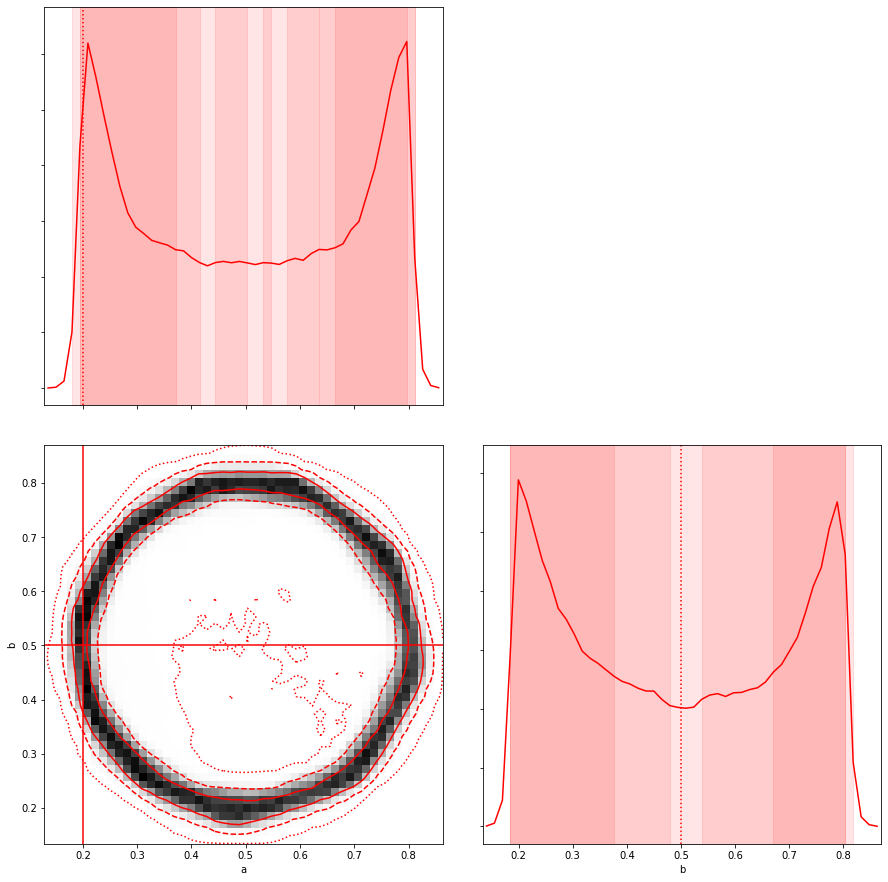

In [95]:
s.infer2d(N = 100000, train_args = dict(batch_size=64, n_hidden = 512, p = 0.2, n_tail_features = 2, lr_schedule = [1e-3, 3e-4, 1e-4]))
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 100000
Round: 12
Adding 21 new samples. Run simulator!


Simulate: 100%|██████████| 21/21 [00:00<00:00, 910.35it/s]


n_features = 1
Start training
LR iteration 0
Validation loss: 2.7803745999705973
Validation loss: 2.732117703016237
Validation loss: 2.7509699094590903
Total epochs: 3
LR iteration 1
Validation loss: 2.68153359723701
Validation loss: 2.6878264196437422
Total epochs: 2


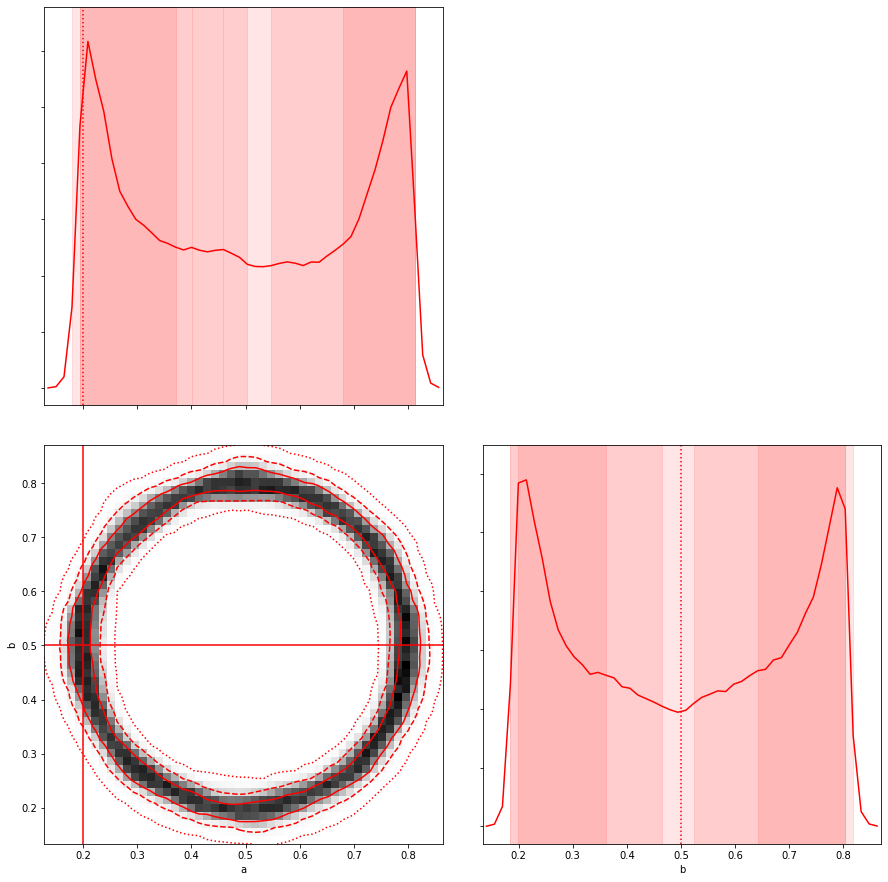

In [96]:
s.infer2d(N = 100000, train_args = dict(batch_size=64, n_hidden = 128, p = 0.2, n_tail_features = 2, lr_schedule = [1e-3, 3e-4, 1e-4]))
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 100000
Round: 13
Adding 10 new samples. Run simulator!


Simulate: 100%|██████████| 10/10 [00:00<00:00, 922.05it/s]


n_features = 1
Start training
LR iteration 0
Validation loss: 2.8489023456565863
Validation loss: 2.7890661761438627
Validation loss: 2.7547688769827263
Validation loss: 2.7634021190049456
Total epochs: 4
LR iteration 1
Validation loss: 2.7058247232989823
Validation loss: 2.706216883578365
Total epochs: 2


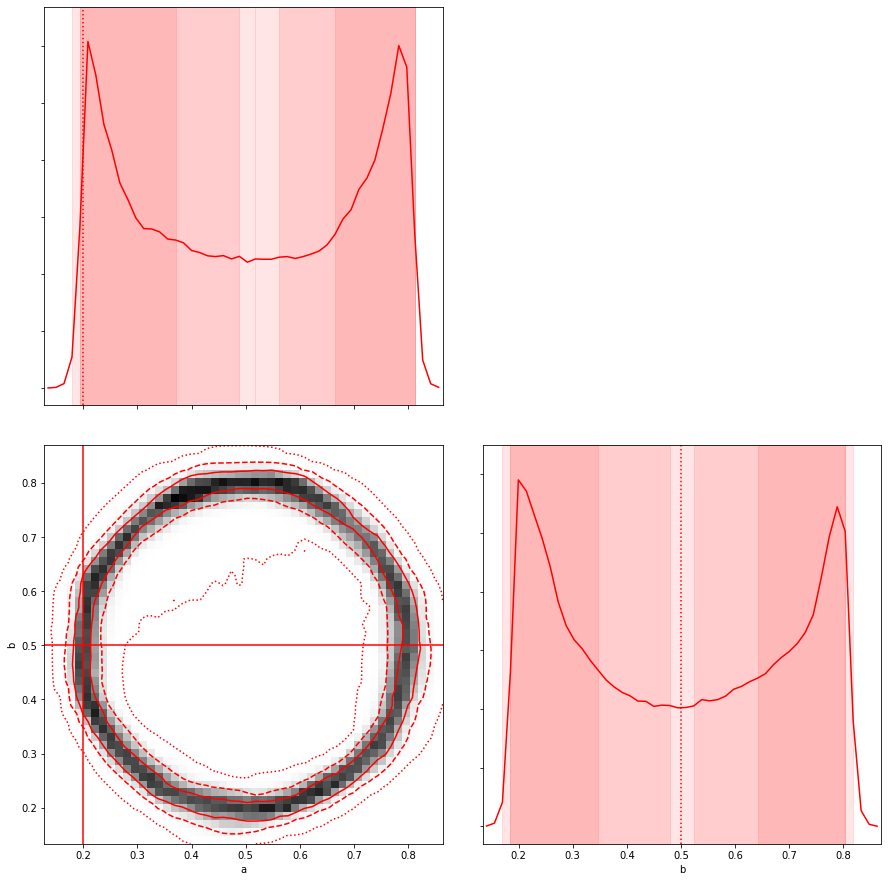

In [97]:
s.infer2d(N = 100000, train_args = dict(batch_size=4, n_hidden = 256, p = 0.2, n_tail_features = 2, lr_schedule = [1e-3, 3e-4, 1e-4]))
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 100000
Round: 14
Adding 180 new samples. Run simulator!


Simulate: 100%|██████████| 180/180 [00:00<00:00, 1023.03it/s]


n_features = 1
Start training
LR iteration 0
Validation loss: 2.918719374566532
Validation loss: 2.8695396704258296
Validation loss: 2.8016551779709653
Validation loss: 2.7678143192919418
Validation loss: 2.775946378564949
Total epochs: 5
LR iteration 1
Validation loss: 2.6890303853699726
Validation loss: 2.6988210482515402
Total epochs: 2


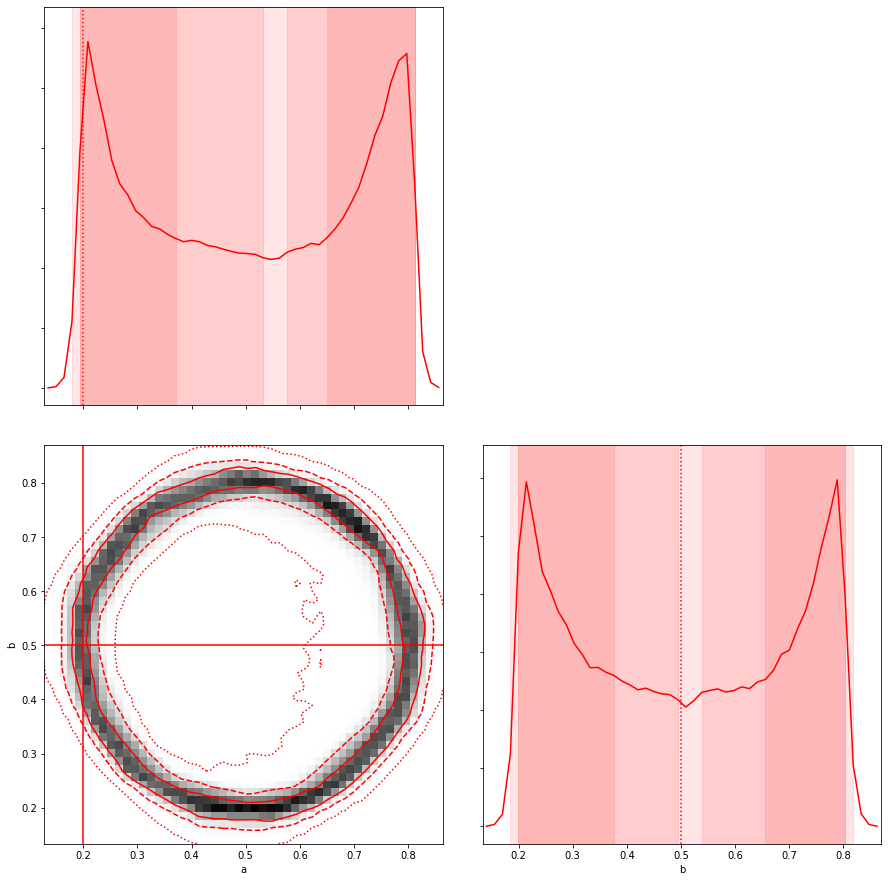

In [98]:
s.infer2d(N = 100000, train_args = dict(batch_size=64, n_hidden = 256, p = 0.5, n_tail_features = 10, lr_schedule = [1e-3, 3e-4, 1e-4]))
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 50000
Round: 15
No new simulator runs required.
No simulations required.
n_features = 1
Start training
LR iteration 0
Validation loss: 2.939677201300788
Validation loss: 2.8314106356706934
Validation loss: 2.7931169655969104
Validation loss: 2.7762434283415858
Validation loss: 2.8021523175860863
Total epochs: 5
LR iteration 1
Validation loss: 2.7188162565421905
Validation loss: 2.726612627506256
Total epochs: 2


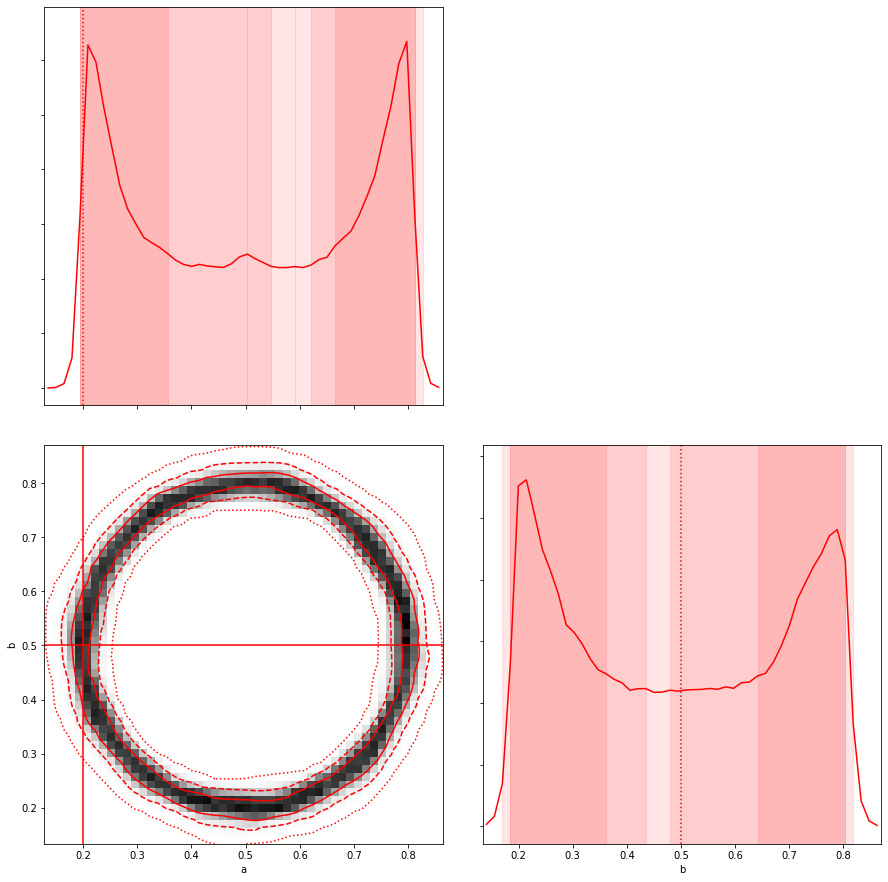

In [99]:
s.infer2d(N = 50000, train_args = dict(batch_size=128, n_hidden = 512, p = 0.2, n_tail_features = 2, lr_schedule = [1e-3, 3e-4, 1e-4]))
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 20000
Round: 16
No new simulator runs required.
No simulations required.
n_features = 1
Start training
LR iteration 0
Validation loss: 3.098987892033562
Validation loss: 2.962469036616976
Validation loss: 2.9843046478335817
Total epochs: 3
LR iteration 1
Validation loss: 2.9159614299497907
Validation loss: 2.903407371706433
Validation loss: 2.8846441329944703
Validation loss: 2.8850773778699694
Total epochs: 4


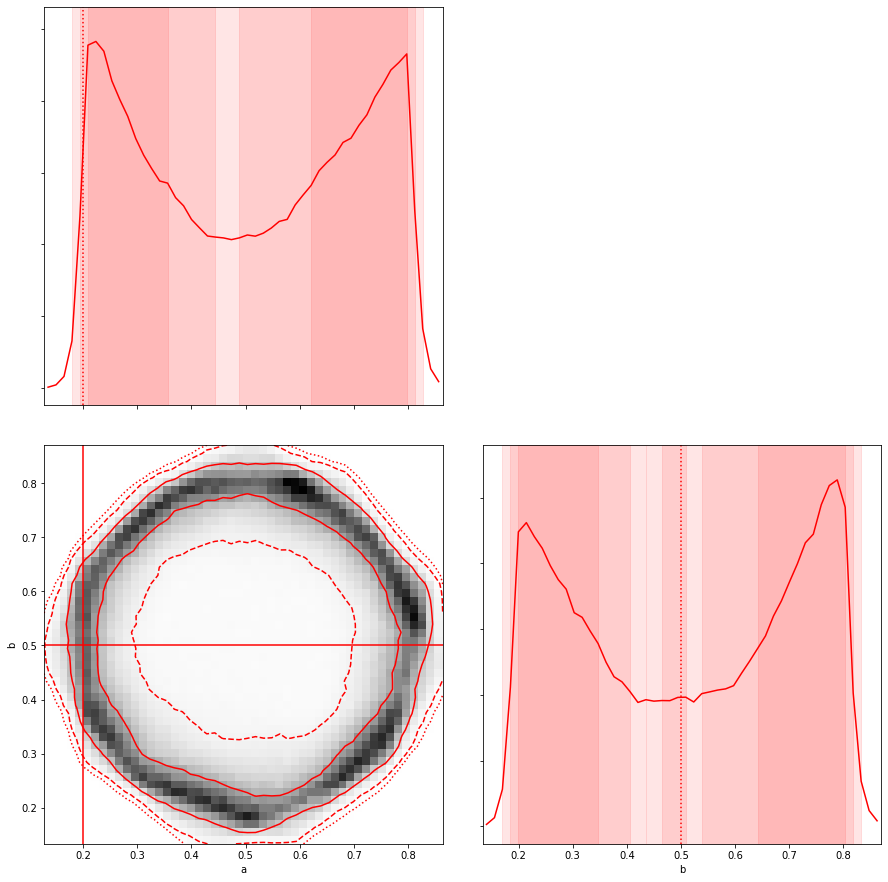

In [100]:
s.infer2d(N = 20000, train_args = dict(batch_size=64, n_hidden = 256, p = 0.2, n_tail_features = 1, lr_schedule = [1e-3, 3e-4, 1e-4]))
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 50000
Round: 17
No new simulator runs required.
No simulations required.
n_features = 1
Start training
LR iteration 0
Validation loss: 3.0096258472122455
Validation loss: 2.9118870060409656
Validation loss: 2.878351536141248
Validation loss: 2.8825332557565666
Total epochs: 4
LR iteration 1
Validation loss: 2.7851975617701545
Validation loss: 2.7658702615630686
Validation loss: 2.777902279459118
Total epochs: 3


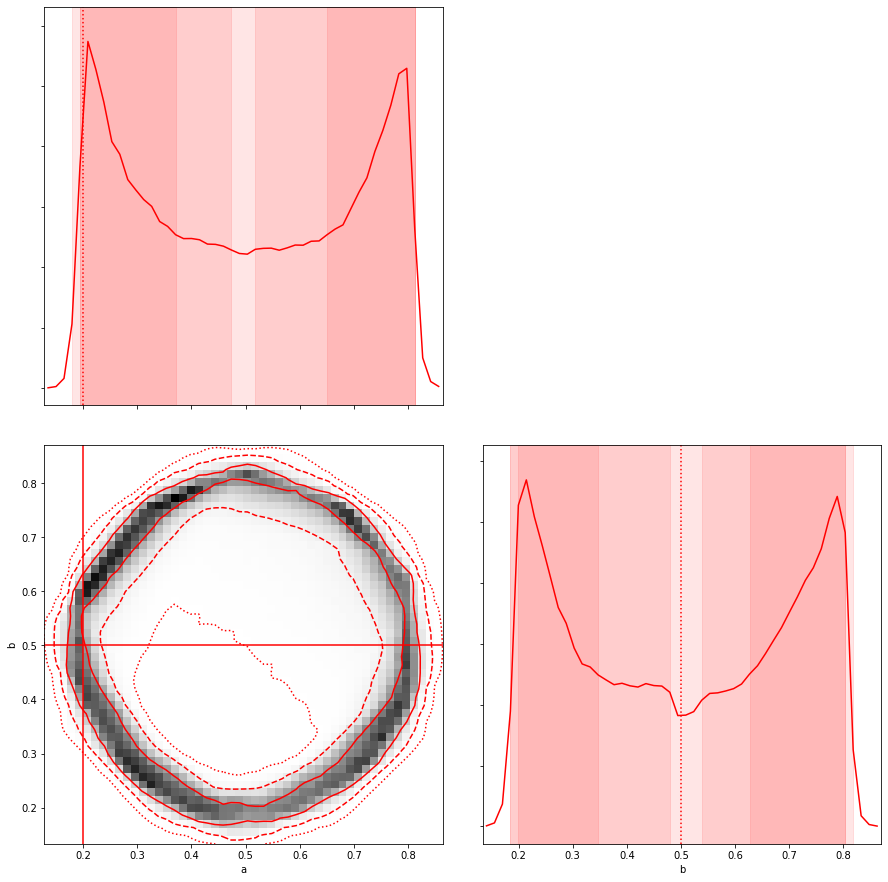

In [101]:
s.infer2d(N = 50000, train_args = dict(batch_size=64, n_hidden = 256, p = 0.2, n_tail_features = 1, lr_schedule = [1e-3, 3e-4, 1e-4]))
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)

N = 20000
Round: 18
No new simulator runs required.
No simulations required.
n_features = 1
Start training
LR iteration 0
Validation loss: 3.0972648447468165
Validation loss: 2.9983373419159935
Validation loss: 2.9495947805662004
Validation loss: 2.8797156063337175
Validation loss: 2.8841883800332506
Total epochs: 5
LR iteration 1
Validation loss: 2.787259053616297
Validation loss: 2.799251681518933
Total epochs: 2


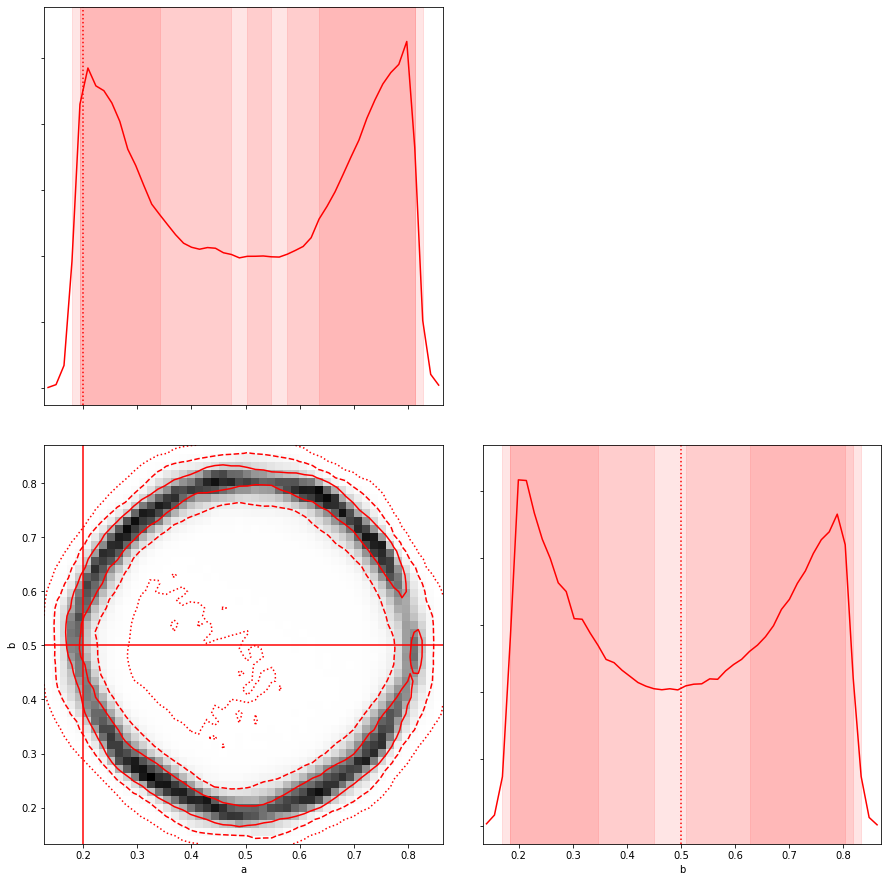

In [102]:
s.infer2d(N = 20000, train_args = dict(batch_size=32, n_hidden = 128, p = 0.1, n_tail_features = 1, lr_schedule = [1e-3, 3e-4, 1e-4]))
post = s.posteriors(n_samples = 1000000)
swyft.corner(post, ["a", "b"], color='r', figsize = (15,15), truth=par0, bins = 50)